## Варіант 3
### 1) Виведіть перші 8 рядків набору даних

In [2]:
import numpy as np
import pandas as pd

##first 8
csv_file = 'NationalNames.csv'
model = pd.read_csv(csv_file)
# Виведення перших 8 рядків
print(model.head(8))

   Id       Name  Year Gender  Count
0   1       Mary  1880      F   7065
1   2       Anna  1880      F   2604
2   3       Emma  1880      F   2003
3   4  Elizabeth  1880      F   1939
4   5     Minnie  1880      F   1746
5   6   Margaret  1880      F   1578
6   7        Ida  1880      F   1472
7   8      Alice  1880      F   1414


## 2) Вивести останні 8 рядків набору данних

In [3]:
print(model.tail(8))

              Id     Name  Year Gender  Count
1825425  1825426       Zo  2014      M      5
1825426  1825427    Zyeir  2014      M      5
1825427  1825428     Zyel  2014      M      5
1825428  1825429   Zykeem  2014      M      5
1825429  1825430   Zymeer  2014      M      5
1825430  1825431  Zymiere  2014      M      5
1825431  1825432    Zyran  2014      M      5
1825432  1825433    Zyrin  2014      M      5


## 4) Отримайте загальну інформацію про дані у наборі даних

In [5]:
print(model.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825433 entries, 0 to 1825432
Data columns (total 5 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Name    object
 2   Year    int64 
 3   Gender  object
 4   Count   int64 
dtypes: int64(3), object(2)
memory usage: 69.6+ MB
None


## 5) Знайдіть кількість унікальних імен у наборі даних

In [6]:
# Знайдіть кількість унікальних імен
unique_names_count = model['Name'].nunique()
print("Кількість унікальних імен у наборі даних:", unique_names_count)

Кількість унікальних імен у наборі даних: 93889


## 6) Обчисліть кількість унікальних жіночих та чоловічих імен у наборі даних

In [7]:
# Розділення даних на два піднабори за статтю
female_names = model[model['Gender'] == 'F']
male_names = model[model['Gender'] == 'M']

# Знайдення кількості унікальних жіночих та чоловічих імен
unique_female_names_count = female_names['Name'].nunique()
unique_male_names_count = male_names['Name'].nunique()

print("Кількість унікальних жіночих імен у наборі даних:", unique_female_names_count)
print("Кількість унікальних чоловічих імен у наборі даних:", unique_male_names_count)

Кількість унікальних жіночих імен у наборі даних: 64911
Кількість унікальних чоловічих імен у наборі даних: 39199


## 7) Знайдіть 5 найпопулярніших чоловічих імен у 2010 році

In [9]:
men2010_mask = (model['Year'] == 2010) & (model['Gender'] == 'M')
men_names = model[men2010_mask].sort_values(by='Count', ascending=False).head(5)
men_names

,Id,Name,Year,Gender,Count
1677392,1677393,Jacob,2010,M,22082
1677393,1677394,Ethan,2010,M,17985
1677394,1677395,Michael,2010,M,17308
1677395,1677396,Jayden,2010,M,17152
1677396,1677397,William,2010,M,17030


## 8) Знайдіть найпопулярніше ім'я за результатами одного року (ім'я, для якого Count максимальне)

In [10]:
name_counts_by_year = model.groupby(['Year', 'Name']).size().reset_index(name='Count')
most_popular_name = name_counts_by_year.loc[name_counts_by_year['Count'].idxmax()]
print("Найпопулярніше ім'я за результатами одного року:", most_popular_name['Name'], "в", most_popular_name['Year'], "році.")

Найпопулярніше ім'я за результатами одного року: Addie в 1880 році.


## 9) Підрахуйте кількість записів, для яких Count мінімальне у наборі

In [11]:
min_count = model['Count'].min()
min_count_records_count = len(model[model['Count'] == min_count])

print("Кількість записів, для яких Count є мінімальним у наборі даних:", min_count_records_count)

Кількість записів, для яких Count є мінімальним у наборі даних: 254615


## 10) Підрахуйте кількість унікальних імен у кожному році

In [12]:
unique_names_by_year = model.groupby('Year')['Name'].nunique()

print("Кількість унікальних імен у кожному році:")
print(unique_names_by_year)

Кількість унікальних імен у кожному році:
Year
1880     1889
1881     1830
1882     2012
1883     1962
1884     2158
        ...  
2010    31603
2011    31418
2012    31236
2013    30774
2014    30579
Name: Name, Length: 135, dtype: int64


## 11) Знайдіть рік із найбільшою кількістю унікальних імен

In [13]:
year_with_max_unique_names = model.groupby('Year')['Name'].nunique().idxmax()

print("Рік із найбільшою кількістю унікальних імен:", year_with_max_unique_names)

Рік із найбільшою кількістю унікальних імен: 2008


## 12) Знайдіть найпопулярніше ім'я в році з найбільшою кількістю унікальних імен (2008)

In [14]:
data_2008 = model[model['Year'] == 2008]

most_popular_name_2008 = data_2008[data_2008['Count'] == data_2008['Count'].max()]['Name'].iloc[0]

print("Найпопулярніше ім'я в 2008 році:", most_popular_name_2008)

Найпопулярніше ім'я в 2008 році: Jacob


## 18) Підрахуйте кількість років, коли дівчаток народжувалося більше, ніж хлопчиків.

In [15]:
gender_counts_by_year = model.groupby(['Year', 'Gender']).size().unstack(fill_value=0)

years_with_more_girls = (gender_counts_by_year['F'] > gender_counts_by_year['M']).sum()

print("Кількість років, коли дівчаток народжувалося більше, ніж хлопчиків:", years_with_more_girls)

Кількість років, коли дівчаток народжувалося більше, ніж хлопчиків: 132


## 19) Накресліть графік загальної кількості народжень хлопчиків та дівчаток на рік

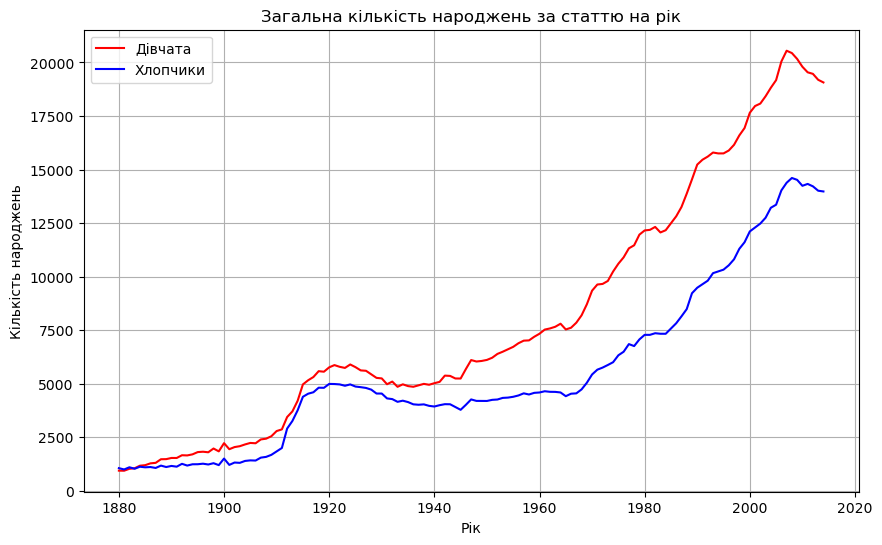

In [17]:
import matplotlib.pyplot as plt

gender_counts_by_year = model.groupby(['Year', 'Gender']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
plt.plot(gender_counts_by_year.index, gender_counts_by_year['F'], label='Дівчата', color='red')
plt.plot(gender_counts_by_year.index, gender_counts_by_year['M'], label='Хлопчики', color='blue')

plt.title('Загальна кількість народжень за статтю на рік')
plt.xlabel('Рік')
plt.ylabel('Кількість народжень')
plt.legend()
plt.grid(True)
plt.show()

## 20) Підрахуйте кількість гендерно-нейтральних імен (однакових для дівчат та хлопців)

In [18]:
neutral_names = set(model[model['Gender'] == 'F']['Name']).intersection(set(model[model['Gender'] == 'M']['Name']))
neutral_names_count = len(neutral_names)
print("Кількість гендерно-нейтральних імен:", neutral_names_count)

Кількість гендерно-нейтральних імен: 10221


## 21) Порахуйте, скільки разів хлопчиків називали Barbara

In [20]:
barbara = model[(model['Gender'] == 'M') & (model['Name'] == 'Barbara')]
barbara['Count'].sum()

4139

## 23) Знайти найпопулярніші гендерно-нейтральні імена (ті, що присутні кожного року)

In [21]:
neutral_names = set(model[model['Gender'] == 'F']['Name']).intersection(set(model[model['Gender'] == 'M']['Name']))
neutral_names_by_year = model[model['Name'].isin(neutral_names)].groupby(['Year', 'Name']).size().reset_index(name='Count')

popular_neutral_names = neutral_names_by_year.groupby('Name').size()
popular_neutral_names = popular_neutral_names[popular_neutral_names == model['Year'].nunique()].index.tolist()

print("Найпопулярніші гендерно-нейтральні імена (ті, що присутні кожного року):")
print(popular_neutral_names)


Найпопулярніші гендерно-нейтральні імена (ті, що присутні кожного року):
['Aaron', 'Abbie', 'Abel', 'Abigail', 'Abraham', 'Ada', 'Adam', 'Addie', 'Addison', 'Adele', 'Adeline', 'Adrian', 'Agnes', 'Aimee', 'Al', 'Albert', 'Alberta', 'Alden', 'Alex', 'Alexander', 'Alfred', 'Alice', 'Aline', 'Allan', 'Allen', 'Allie', 'Alma', 'Alonzo', 'Alpha', 'Alta', 'Althea', 'Alton', 'Alva', 'Alvin', 'Alvina', 'Amanda', 'Amelia', 'America', 'Amie', 'Amos', 'Amy', 'Anastasia', 'Anderson', 'Andrew', 'Andy', 'Angela', 'Angelina', 'Angeline', 'Angie', 'Anita', 'Ann', 'Anna', 'Annabelle', 'Anne', 'Annette', 'Annie', 'Anthony', 'Antoinette', 'Anton', 'Antonia', 'Antonio', 'Ara', 'Archie', 'Arnold', 'Aron', 'Art', 'Arthur', 'Asa', 'Aubrey', 'August', 'Augusta', 'Augustine', 'Augustus', 'Austin', 'Ava', 'Avery', 'Bailey', 'Barbara', 'Basil', 'Beatrice', 'Bella', 'Ben', 'Benjamin', 'Bennett', 'Bennie', 'Bernard', 'Bernice', 'Bert', 'Bertha', 'Bess', 'Bessie', 'Betsy', 'Betty', 'Bill', 'Blanche', 'Bob', 'Bonnie

## 25) Побудувати графік розподілення кількості імен John та Mary по роках без залежності від статі

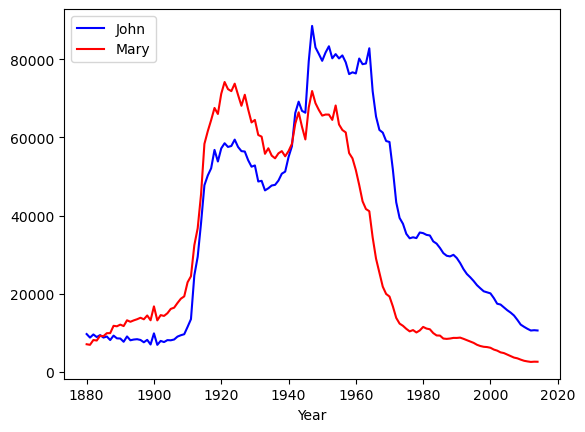

In [24]:
mary = model[model['Name'] == 'Mary']
john = model[model['Name'] == 'John']

mary_count = mary.groupby(['Year'])['Count'].sum()
john_count = john.groupby(['Year'])['Count'].sum()

plt.plot(john_count.index, john_count, label='John', color='blue')
plt.plot(mary_count.index, mary_count, label='Mary', color='red')

plt.xlabel('Year')
plt.ylabel('')
legend = plt.legend(loc='upper left', frameon=True)


## 27) Знайти найпопулярніші імена в кожному році

In [25]:
popular_names_by_year = model.loc[model.groupby('Year')['Count'].idxmax()][['Year', 'Name']]
print(popular_names_by_year)

         Year      Name
942      1880      John
2938     1881      John
4963     1882      John
7116     1883      John
9318     1884      John
...       ...       ...
1657592  2010  Isabella
1691633  2011    Sophia
1725502  2012    Sophia
1759186  2013    Sophia
1792389  2014      Emma

[135 rows x 2 columns]
